In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib

%matplotlib inline

In [2]:
df = pd.read_csv(
    "../../mount/data/pokemon/pokemon_status.csv", 
    encoding= "cp932"
)

df.head()

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
0,1,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318.0
1,2,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405.0
2,3,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525.0
3,003-1,メガフシギバナ,くさ,どく,あついしぼう,NaN,NaN,80,100,123,122,120,80,625.0
4,4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   図鑑番号    909 non-null    object 
 1   ポケモン名   909 non-null    object 
 2   タイプ１    909 non-null    object 
 3   タイプ２    487 non-null    object 
 4   通常特性１   909 non-null    object 
 5   通常特性２   458 non-null    object 
 6   夢特性     729 non-null    object 
 7   HP      909 non-null    int64  
 8   こうげき    909 non-null    int64  
 9   ぼうぎょ    909 non-null    int64  
 10  とくこう    909 non-null    int64  
 11  とくぼう    909 non-null    int64  
 12  すばやさ    909 non-null    int64  
 13  合計      907 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 99.5+ KB


In [4]:
df[df["合計"].isnull()]

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
814,718,ジガルデ10%,ドラゴン,じめん,オーラブレイク,スワームチェンジ,54,100,71,61,85,115,486,NaN
815,718-1,ジガルデ50%,ドラゴン,じめん,オーラブレイク,スワームチェンジ,108,100,121,81,95,95,600,NaN


In [5]:
c_idx = df[df["合計"].isnull()].index
c_col = df.columns[6:-1]
u_col = df.columns[7:]

df.loc[c_idx, u_col] = df.loc[df[df["合計"].isnull()].index, c_col].values
df.loc[c_idx, "夢特性"] = None

df.iloc[c_idx]

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
814,718,ジガルデ10%,ドラゴン,じめん,オーラブレイク,スワームチェンジ,None,54,100,71,61,85,115,486.0
815,718-1,ジガルデ50%,ドラゴン,じめん,オーラブレイク,スワームチェンジ,None,108,100,121,81,95,95,600.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   図鑑番号    909 non-null    object 
 1   ポケモン名   909 non-null    object 
 2   タイプ１    909 non-null    object 
 3   タイプ２    487 non-null    object 
 4   通常特性１   909 non-null    object 
 5   通常特性２   458 non-null    object 
 6   夢特性     727 non-null    object 
 7   HP      909 non-null    object 
 8   こうげき    909 non-null    int64  
 9   ぼうぎょ    909 non-null    int64  
 10  とくこう    909 non-null    int64  
 11  とくぼう    909 non-null    int64  
 12  すばやさ    909 non-null    int64  
 13  合計      909 non-null    float64
dtypes: float64(1), int64(5), object(8)
memory usage: 99.5+ KB


In [7]:
df["HP"] = df["HP"].astype(int)
df["合計"] = df["合計"].astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   図鑑番号    909 non-null    object
 1   ポケモン名   909 non-null    object
 2   タイプ１    909 non-null    object
 3   タイプ２    487 non-null    object
 4   通常特性１   909 non-null    object
 5   通常特性２   458 non-null    object
 6   夢特性     727 non-null    object
 7   HP      909 non-null    int64 
 8   こうげき    909 non-null    int64 
 9   ぼうぎょ    909 non-null    int64 
 10  とくこう    909 non-null    int64 
 11  とくぼう    909 non-null    int64 
 12  すばやさ    909 non-null    int64 
 13  合計      909 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 99.5+ KB


In [9]:
zukan = "図鑑番号"

df_first = df[df[zukan].str.find("-") < 0][:151]
df_first.head()

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
0,1,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318
1,2,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405
2,3,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525
4,4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309
5,5,リザード,ほのお,NaN,もうか,NaN,サンパワー,58,64,58,80,65,80,405


In [10]:
df.sort_values(
    "すばやさ", 
    ascending=False
)

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
449,386-3,デオキシスS,エスパー,NaN,プレッシャー,NaN,NaN,50,95,90,95,90,180,600
333,291,テッカニン,むし,ひこう,かそく,NaN,すりぬけ,61,90,45,50,50,160,456
901,795,フェローチェ,むし,かくとう,ビーストブースト,NaN,NaN,71,137,37,137,37,151,570
125,101,マルマイン,でんき,NaN,ぼうおん,せいでんき,ゆうばく,60,50,70,80,80,150,490
446,386,デオキシスN,エスパー,NaN,プレッシャー,NaN,NaN,50,150,50,150,50,150,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,438,ウソハチ,いわ,NaN,がんじょう,いしあたま,びびり,50,80,95,10,45,10,290
677,597,テッシード,くさ,はがね,てつのトゲ,NaN,てつのトゲ,44,50,91,24,86,10,305
248,213,ツボツボ,むし,いわ,がんじょう,くいしんぼう,あまのじゃく,20,10,230,10,230,5,505
876,771,ナマコブシ,みず,NaN,とびだすなかみ,NaN,てんねん,55,60,130,30,130,5,410


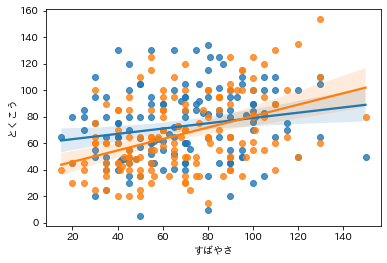

In [11]:
for st in ["こうげき", "とくこう"]:
    sns.regplot(x = df_first["すばやさ"], y= df_first[st])

<AxesSubplot:>

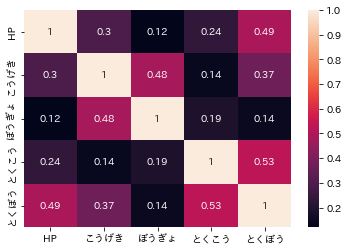

In [12]:
sns.heatmap(df_first[df_first.columns[7:-2]].corr(), annot = True)

In [22]:
df_first_c = df_first.copy()

u_col

for st in u_col:
    print(st)
    df_first_c[st+"_per"] = df_first_c[st] / df_first_c["合計"]

HP
こうげき
ぼうぎょ
とくこう
とくぼう
すばやさ
合計


In [24]:
df_first_c.describe()

,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計,すばとこ,HP_per,こうげき_per,ぼうぎょ_per,とくこう_per,とくぼう_per,すばやさ_per,合計_per
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0
mean,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225,407.642384,136.205298,0.157501,0.178561,0.169328,0.162529,0.159914,0.172167,1.0
std,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598,99.875212,46.620070,0.058614,0.050079,0.059727,0.052458,0.039296,0.062769,0.0
min,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,195.000000,50.000000,0.037736,0.011111,0.011111,0.066667,0.076923,0.047619,1.0
25%,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,320.000000,99.000000,0.124405,0.147548,0.133963,0.124228,0.138174,0.132240,1.0
50%,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,405.000000,130.000000,0.149425,0.171875,0.154088,0.155340,0.160000,0.166667,1.0
75%,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000,490.000000,170.000000,0.171254,0.212584,0.191037,0.197531,0.184429,0.210178,1.0
max,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,680.000000,284.000000,0.555556,0.323077,0.415584,0.338710,0.298507,0.400000,1.0


In [25]:
df_first_cc = df_first_c[df_first_c.columns[-7:-1]]
df_first_cc

,HP_per,こうげき_per,ぼうぎょ_per,とくこう_per,とくぼう_per,すばやさ_per
0,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509
1,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148
2,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381
4,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356
5,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531
...,...,...,...,...,...,...
177,0.136667,0.213333,0.150000,0.166667,0.166667,0.166667
178,0.145238,0.200000,0.154762,0.166667,0.166667,0.166667
179,0.151667,0.223333,0.158333,0.166667,0.166667,0.133333
180,0.155882,0.161765,0.132353,0.226471,0.132353,0.191176


<AxesSubplot:>

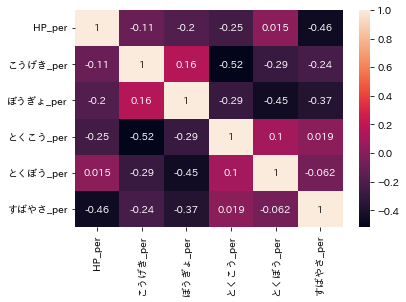

In [27]:
sns.heatmap(df_first_cc.corr(), annot = True)

AttributeError: module 'seaborn' has no attribute 'plt'

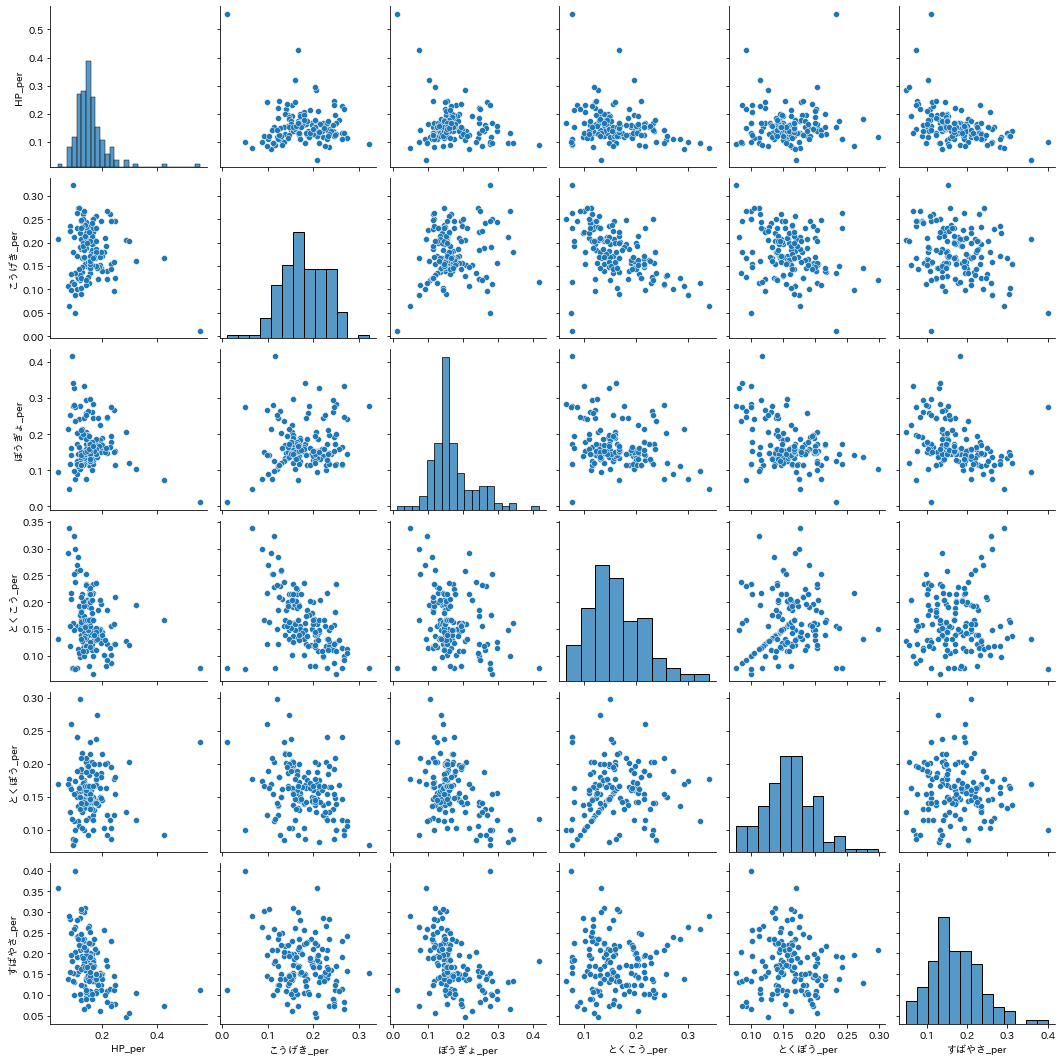

In [28]:
sns.pairplot(df_first_cc)
sns.plt.show()

In [29]:
df_first

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計,すばとこ
0,1,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318,110
1,2,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405,140
2,3,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525,180
4,4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309,125
5,5,リザード,ほのお,NaN,もうか,NaN,サンパワー,58,64,58,80,65,80,405,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,147,ミニリュウ,ドラゴン,NaN,だっぴ,NaN,ふしぎなうろこ,41,64,45,50,50,50,300,100
178,148,ハクリュー,ドラゴン,NaN,だっぴ,NaN,ふしぎなうろこ,61,84,65,70,70,70,420,140
179,149,カイリュー,ドラゴン,ひこう,せいしんりょく,NaN,マルチスケイル,91,134,95,100,100,80,600,180
180,150,ミュウツー,エスパー,NaN,プレッシャー,NaN,きんちょうかん,106,110,90,154,90,130,680,284


In [30]:
from sklearn.cluster import KMeans


ModuleNotFoundError: No module named 'k_neighbor'

In [14]:
df_first.sort_values("すばやさ", ascending=False).head(10)

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
125,101,マルマイン,でんき,NaN,ぼうおん,せいでんき,ゆうばく,60,50,70,80,80,150,490
171,142,プテラ,いわ,ひこう,いしあたま,プレッシャー,きんちょうかん,80,105,65,60,75,130,515
164,135,サンダース,でんき,NaN,ちくでん,NaN,はやあし,65,65,60,110,95,130,525
180,150,ミュウツー,エスパー,NaN,プレッシャー,NaN,きんちょうかん,106,110,90,154,90,130,680
81,65,フーディン,エスパー,NaN,シンクロ,せいしんりょく,マジックガード,55,50,45,135,95,120,500
64,51,ダグトリオ,じめん,NaN,すながくれ,ありじごく,すなのちから,35,100,50,50,70,120,425
148,121,スターミー,みず,エスパー,はっこう,しぜんかいふく,アナライズ,60,75,85,100,85,115,520
68,53,ペルシアン,ノーマル,NaN,じゅうなん,テクニシャン,きんちょうかん,65,70,60,65,65,115,440
156,128,ケンタロス,ノーマル,NaN,いかく,いかりのつぼ,ちからずく,75,100,95,40,70,110,490
117,94,ゲンガー,ゴースト,どく,のろわれボディ,NaN,NaN,60,65,60,130,75,110,500


In [15]:
df_first.sort_values("とくぼう", ascending=False).head(10)

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
174,144,フリーザー,こおり,ひこう,プレッシャー,NaN,ゆきがくれ,90,85,100,95,125,85,580
149,122,バリヤード,エスパー,フェアリー,ぼうおん,フィルター,テクニシャン,40,45,65,100,120,90,460
90,73,ドククラゲ,みず,どく,クリアボディ,ヘドロえき,あめうけざら,80,70,65,80,120,100,515
121,97,スリーパー,エスパー,NaN,ふみん,よちむ,せいしんりょく,85,73,70,73,115,67,483
165,136,ブースター,ほのお,NaN,もらいび,NaN,こんじょう,65,130,60,95,110,65,525
173,143,カビゴン,ノーマル,NaN,めんえき,あついしぼう,くいしんぼう,160,110,65,65,110,30,540
133,107,エビワラー,かくとう,NaN,するどいめ,てつのこぶし,せいしんりょく,50,105,79,35,110,76,455
132,106,サワムラー,かくとう,NaN,じゅうなん,すてみ,かるわざ,50,120,53,35,110,87,455
139,113,ラッキー,ノーマル,NaN,しぜんかいふく,てんのめぐみ,いやしのこころ,250,5,5,35,105,50,450
11,9,カメックス,みず,NaN,げきりゅう,NaN,あめうけざら,79,83,100,85,105,78,530


In [16]:
df_first["すばとこ"] = df_first["すばやさ"]+df_first["とくこう"]

In [17]:
df_first.sort_values("すばとこ", ascending=False).head(10)

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計,すばとこ
180,150,ミュウツー,エスパー,NaN,プレッシャー,NaN,きんちょうかん,106,110,90,154,90,130,680,284
81,65,フーディン,エスパー,NaN,シンクロ,せいしんりょく,マジックガード,55,50,45,135,95,120,500,255
117,94,ゲンガー,ゴースト,どく,のろわれボディ,NaN,NaN,60,65,60,130,75,110,500,240
164,135,サンダース,でんき,NaN,ちくでん,NaN,はやあし,65,65,60,110,95,130,525,240
125,101,マルマイン,でんき,NaN,ぼうおん,せいでんき,ゆうばく,60,50,70,80,80,150,490,230
80,64,ユンゲラー,エスパー,NaN,シンクロ,せいしんりょく,マジックガード,40,35,30,120,70,105,400,225
175,145,サンダー,でんき,ひこう,プレッシャー,NaN,せいでんき,90,90,85,125,90,100,580,225
148,121,スターミー,みず,エスパー,はっこう,しぜんかいふく,アナライズ,60,75,85,100,85,115,520,215
176,146,ファイヤー,ほのお,ひこう,プレッシャー,NaN,ほのおのからだ,90,100,90,125,85,90,580,215
116,93,ゴースト,ゴースト,どく,ふゆう,NaN,NaN,45,50,45,115,55,95,405,210


In [18]:
type_list = set(df["タイプ１"]) & set(df["タイプ２"])
print(type_list)

{'ほのお', 'くさ', 'フェアリー', 'ゴースト', 'みず', 'エスパー', 'はがね', 'じめん', 'ドラゴン', 'むし', 'ノーマル', 'でんき', 'どく', 'かくとう', 'こおり', 'ひこう', 'あく', 'いわ'}


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   図鑑番号    909 non-null    object
 1   ポケモン名   909 non-null    object
 2   タイプ１    909 non-null    object
 3   タイプ２    487 non-null    object
 4   通常特性１   909 non-null    object
 5   通常特性２   458 non-null    object
 6   夢特性     727 non-null    object
 7   HP      909 non-null    int64 
 8   こうげき    909 non-null    int64 
 9   ぼうぎょ    909 non-null    int64 
 10  とくこう    909 non-null    int64 
 11  とくぼう    909 non-null    int64 
 12  すばやさ    909 non-null    int64 
 13  合計      909 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 99.5+ KB


type:ほのお , total:463.49


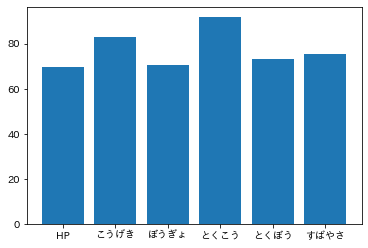

type:くさ , total:418.93


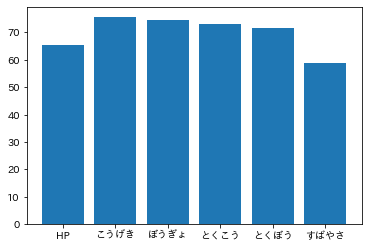

type:フェアリー , total:435.59


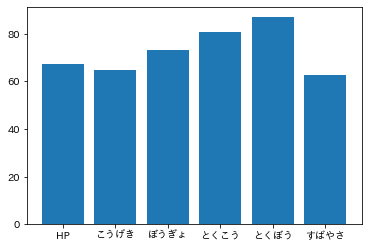

type:ゴースト , total:447.27


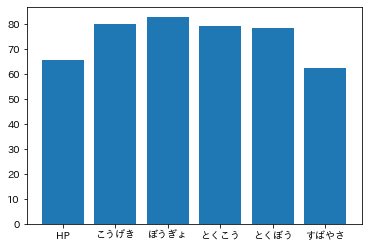

type:みず , total:428.36


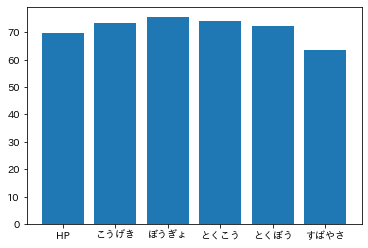

type:エスパー , total:480.94


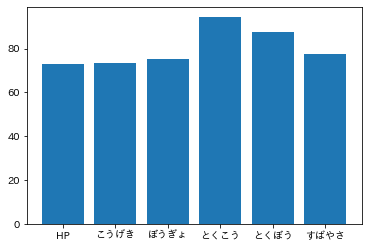

type:はがね , total:485.14


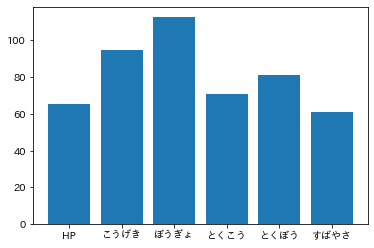

type:じめん , total:441.88


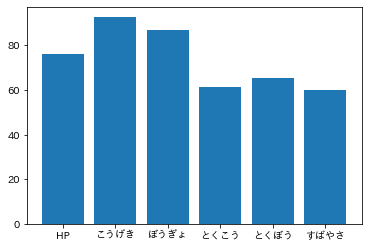

type:ドラゴン , total:536.81


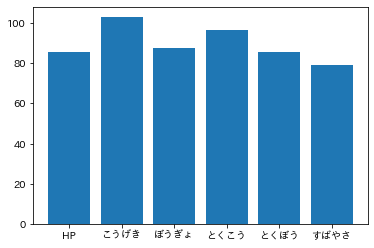

type:むし , total:387.49


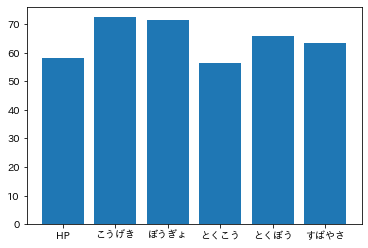

type:ノーマル , total:404.67


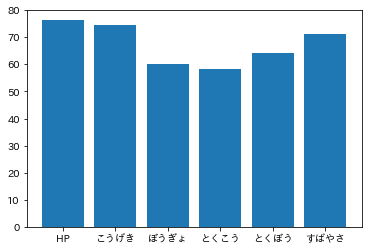

type:でんき , total:447.88


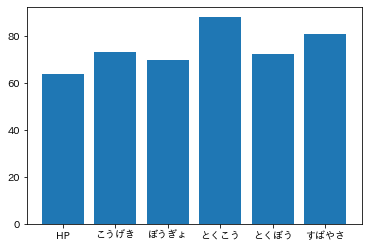

type:どく , total:401.19


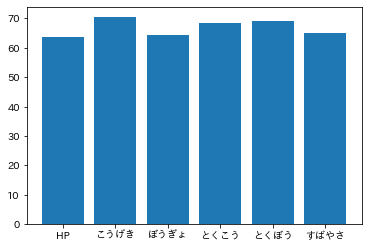

type:かくとう , total:473.37


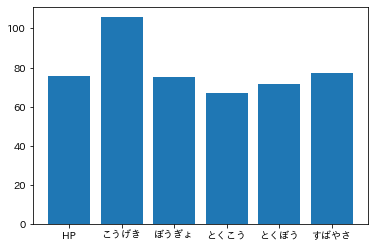

type:こおり , total:461.51


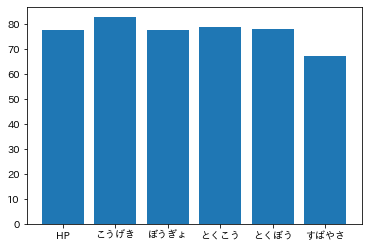

type:ひこう , total:453.50


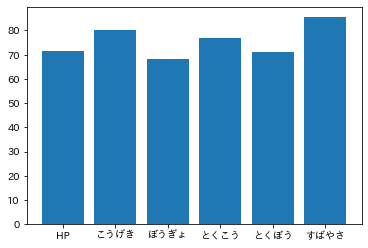

type:あく , total:454.69


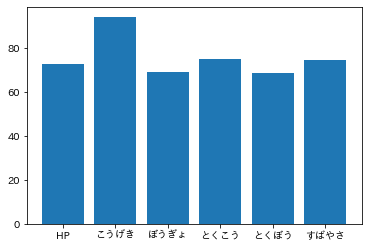

type:いわ , total:449.24


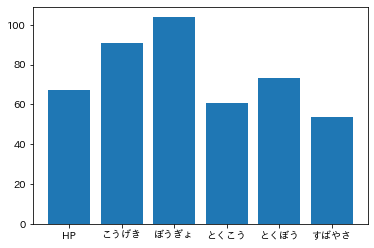

In [20]:
status = u_col[:-1]

for t in type_list:
    df_t = df[(df["タイプ１"] == t) | (df["タイプ２"] == t)]
    print("type:{} , total:{:.2f}".format(t,df_t["合計"].mean()))
    plt.bar(status, height = df_t[status].mean())
    plt.show()